In [2]:
import pandas as pd

data = pd.read_csv('click_stream3.csv', header=None, names=['id','page','date', 'device', 'gender'])

data.head()

,id,page,date,device,gender
0,313593,1_home_page,2015-02-26,Desktop,Female
1,468315,1_home_page,2015-02-21,Desktop,Male
2,264005,1_home_page,2015-03-25,Desktop,Female
3,290784,1_home_page,2015-03-14,Desktop,Male
4,639104,1_home_page,2015-01-03,Desktop,Female


In [3]:
data['month'] = data['date'].apply(lambda date: date[0:7])
data.head()

,id,page,date,device,gender,month
0,313593,1_home_page,2015-02-26,Desktop,Female,2015-02
1,468315,1_home_page,2015-02-21,Desktop,Male,2015-02
2,264005,1_home_page,2015-03-25,Desktop,Female,2015-03
3,290784,1_home_page,2015-03-14,Desktop,Male,2015-03
4,639104,1_home_page,2015-01-03,Desktop,Female,2015-01


In [4]:
monthly = data.groupby(['page','month','gender'])['id'].agg('count').reset_index().sort_values(by='page', ascending=False)
monthly

,page,month,gender,id
31,4_payment_confirmation_page,2015-04,Male,26
30,4_payment_confirmation_page,2015-04,Female,20
29,4_payment_confirmation_page,2015-03,Male,18
28,4_payment_confirmation_page,2015-03,Female,26
27,4_payment_confirmation_page,2015-02,Male,87
26,4_payment_confirmation_page,2015-02,Female,86
25,4_payment_confirmation_page,2015-01,Male,80
24,4_payment_confirmation_page,2015-01,Female,109
17,3_payment_page,2015-01,Male,1147
23,3_payment_page,2015-04,Male,312


In [5]:
months = monthly.groupby('month')['id'].sum().reset_index()
months

,month,id
0,2015-01,38733
1,2015-02,38872
2,2015-03,32154
3,2015-04,32323


In [6]:
import matplotlib.pyplot as plt

C:\Users\FilippKashket\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


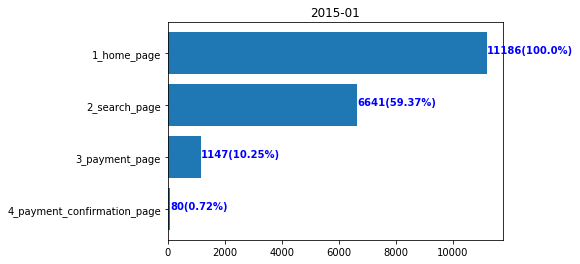

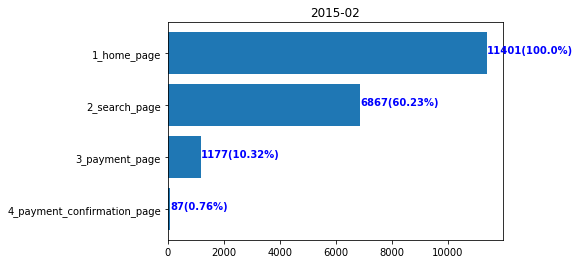

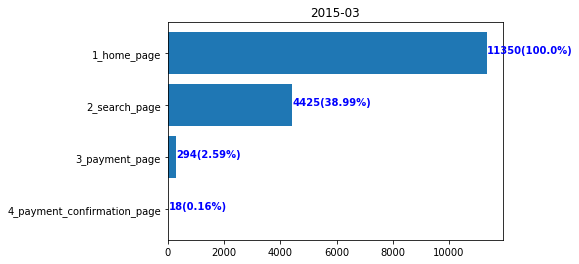

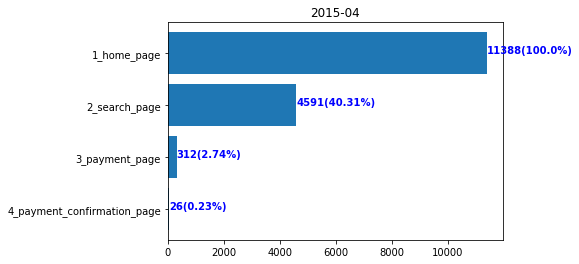

In [17]:
Male = monthly[monthly['gender']=='Male'] 

for index, row in months.iterrows():
    fig, subplot = plt.subplots()
    y = Male[Male['month']==row.month].id
    max_value = monthly[(monthly['gender']=='Male')&(Male['month']==row.month)]['id'].max()
 
    subplot.barh(Male[Male['month']==row.month].page, 
           y)
    subplot.set_title(row.month)
    for i, v in enumerate(y):
        subplot.text(v + 3, i, str(v)+"("+str(round(v/max_value*100,2))+"%)", color='blue', fontweight='bold')

C:\Users\FilippKashket\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


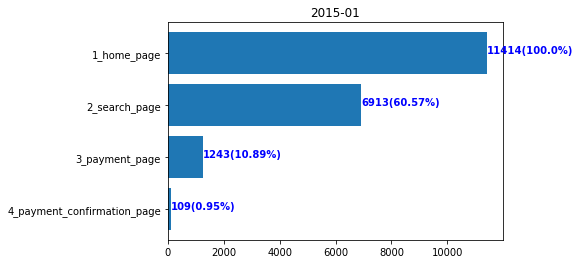

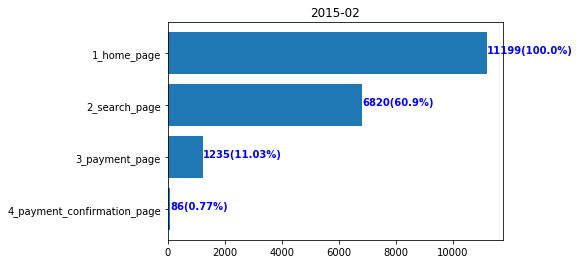

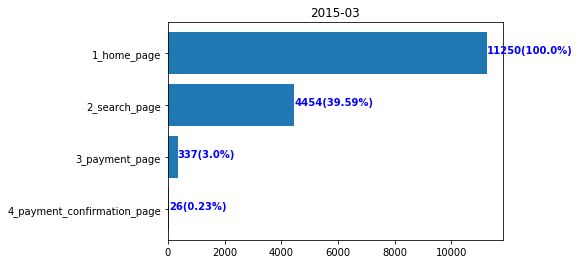

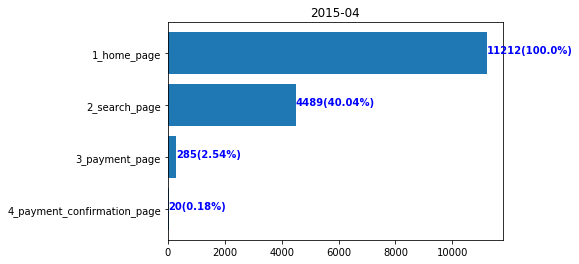

In [16]:
Female = monthly[monthly['gender']=='Female'] 

for index, row in months.iterrows():
    fig, subplot = plt.subplots()
    y = Female[Female['month']==row.month].id
    max_value = monthly[(monthly['gender']=='Female')&(Female['month']==row.month)]['id'].max()
 
    subplot.barh(Female[Female['month']==row.month].page, 
           y)
    subplot.set_title(row.month)
    for i, v in enumerate(y):
        subplot.text(v + 3, i, str(v)+"("+str(round(v/max_value*100,2))+"%)", color='blue', fontweight='bold')

Судя по данным конверсия от пола не зависит.